<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/DL-SatelliteImagery/Satellite_Imagery_DeepLearning-SaveLoadModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code from Part 1 Exercise - Satellite Imagery Data Preparation 



In [44]:
import os
import cv2
from PIL import Image 
import numpy as np 
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random
import os

In [45]:
minmaxscaler = MinMaxScaler()

In [46]:
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /media/piyush/c7487c50-5306-4fd4-b2bd-21fad4e76296/Projects/Dhanush


In [47]:
dataset_root_folder = current_directory
dataset_name = "Semantic segmentation dataset"
image_patch_size = 256

In [48]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,9):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [49]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [43]:
image_dataset

array([[[[0.78823529, 0.76470588, 0.74509804],
         [0.88235294, 0.85882353, 0.83921569],
         [0.94509804, 0.90980392, 0.89411765],
         ...,
         [0.89411765, 0.85882353, 0.82352941],
         [0.85882353, 0.83137255, 0.79607843],
         [0.87843137, 0.85098039, 0.81568627]],

        [[0.88627451, 0.8627451 , 0.84313725],
         [0.99607843, 0.97254902, 0.95294118],
         [1.        , 1.        , 0.98431373],
         ...,
         [0.93333333, 0.89803922, 0.8627451 ],
         [0.92941176, 0.90196078, 0.86666667],
         [0.95294118, 0.91764706, 0.88235294]],

        [[0.97254902, 0.94509804, 0.93333333],
         [1.        , 0.98823529, 0.97647059],
         [1.        , 1.        , 0.98431373],
         ...,
         [0.93333333, 0.89411765, 0.86666667],
         [0.92156863, 0.89411765, 0.85882353],
         [0.90196078, 0.86666667, 0.83137255]],

        ...,

        [[0.88235294, 0.8627451 , 0.86666667],
         [0.81960784, 0.80392157, 0.8       ]

In [50]:
print(len(image_dataset))
print(len(mask_dataset))

840
840


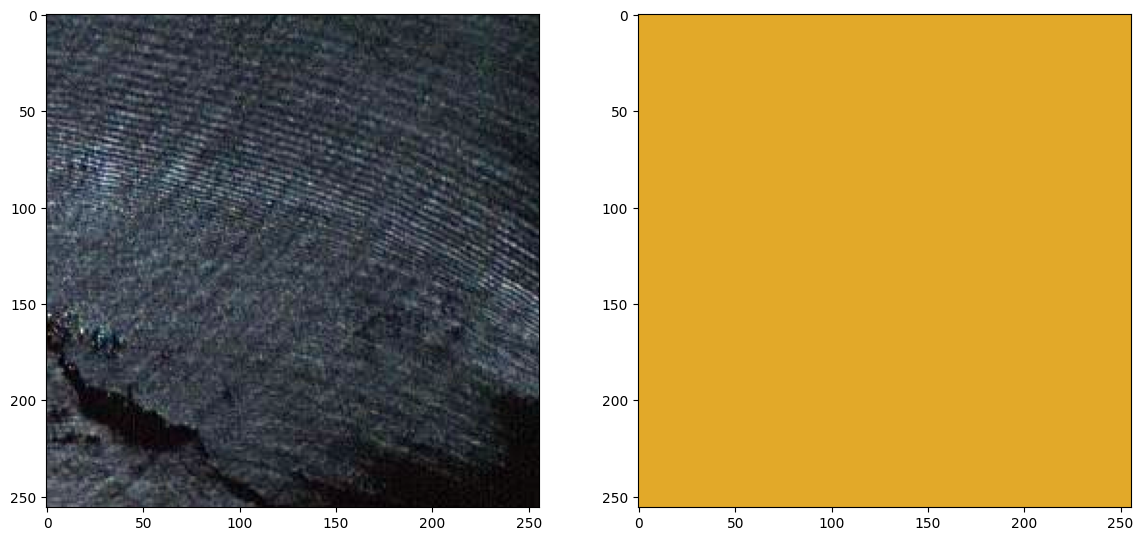

In [51]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [52]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [53]:
label = individual_patched_mask

In [54]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [55]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [56]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [60]:
labels

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [5],
         [5],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [5],
         [5],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [5],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [2],


In [61]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [62]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


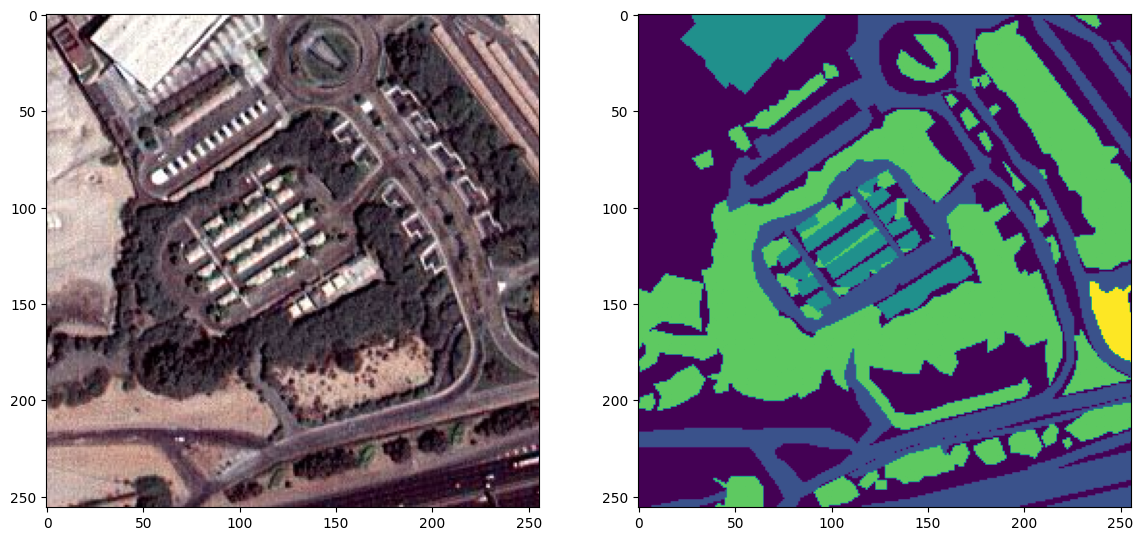

In [63]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [64]:
total_classes = len(np.unique(labels))

In [65]:
total_classes

6

In [66]:
from tensorflow.keras.utils import to_categorical 

2024-05-13 15:41:17.992640: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 15:41:18.017386: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 15:41:18.017695: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 15:41:18.946673: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [67]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [68]:
master_training_dataset = image_dataset

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(714, 256, 256, 3)
(126, 256, 256, 3)
(714, 256, 256, 6)
(126, 256, 256, 6)


In [72]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [73]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# Coding for Part 2: Deep Learning with Satellite Imagery Data

In [ ]:
#!pip install -U segmentation-models

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
# Please uncomment this line to get model confiuration
model.get_config()

{'name': 'model_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_19',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d_19',
   'inbound_nodes': [[['input_2', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config': {'

## Generating Loss Function 

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [ ]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()


In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 256, 256, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

In [ ]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100
51/51 [==============================] - 140s 3s/step - loss: 1.0056 - accuracy: 0.4278 - jaccard_coef: 0.1999 - val_loss: 0.9912 - val_accuracy: 0.6402 - val_jaccard_coef: 0.2883
Epoch 2/100
51/51 [==============================] - 138s 3s/step - loss: 0.9823 - accuracy: 0.6483 - jaccard_coef: 0.3439 - val_loss: 0.9854 - val_accuracy: 0.6161 - val_jaccard_coef: 0.3482
Epoch 3/100
51/51 [==============================] - 137s 3s/step - loss: 0.9623 - accuracy: 0.7147 - jaccard_coef: 0.4426 - val_loss: 0.9943 - val_accuracy: 0.5967 - val_jaccard_coef: 0.3590
Epoch 4/100
51/51 [==============================] - 137s 3s/step - loss: 0.9565 - accuracy: 0.7275 - jaccard_coef: 0.4798 - val_loss: 0.9867 - val_accuracy: 0.6211 - val_jaccard_coef: 0.3975
Epoch 5/100
51/51 [==============================] - 136s 3s/step - loss: 0.9529 - accuracy: 0.7392 - jaccard_coef: 0.4991 - val_loss: 0.9887 - val_accuracy: 0.6346 - val_jaccard_coef: 0.4130
Epoch 6/100
51/51 [=====================

In [ ]:
history_a = model_history

In [ ]:
history_a.history

{'loss': [1.005590796470642,
  0.982260525226593,
  0.962260901927948,
  0.9565023183822632,
  0.9528667330741882,
  0.9473442435264587,
  0.9425656199455261,
  0.93741375207901,
  0.9361283183097839,
  0.9331880807876587,
  0.9296602010726929,
  0.9306323528289795,
  0.9306162595748901,
  0.926385223865509,
  0.9229567050933838,
  0.922489583492279,
  0.9211690425872803,
  0.9198251962661743,
  0.9188861846923828,
  0.9181551933288574,
  0.9166284203529358,
  0.9160622358322144,
  0.9149984121322632,
  0.9136853218078613,
  0.9124280214309692,
  0.9117727279663086,
  0.9107230305671692,
  0.9103273749351501,
  0.9108486175537109,
  0.9088836908340454,
  0.9083701372146606,
  0.9079194068908691,
  0.9062427878379822,
  0.9048159122467041,
  0.9042863845825195,
  0.9031217098236084,
  0.9030372500419617,
  0.9021427035331726,
  0.9007689356803894,
  0.8997894525527954,
  0.9007241725921631,
  0.9039905071258545,
  0.9011000394821167,
  0.8987984657287598,
  0.8974927663803101,
  0.89513

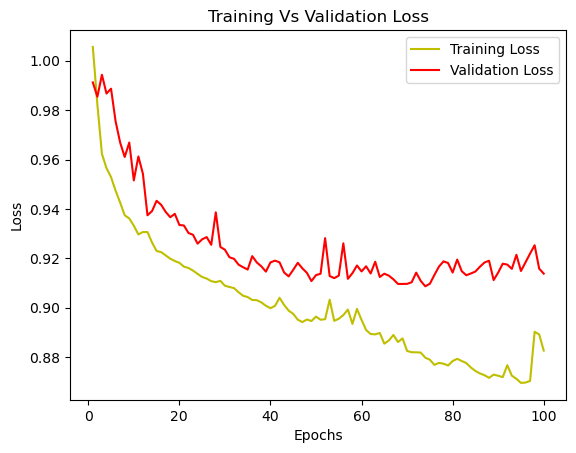

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

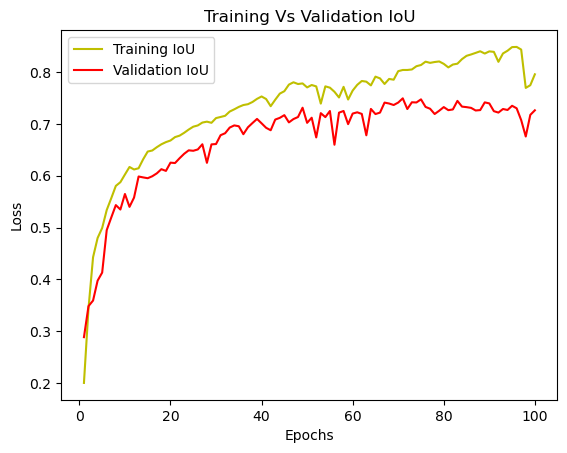

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 3s 624ms/step


In [ ]:
len(y_pred)

142

In [ ]:
y_pred

array([[[[3.19117382e-02, 4.67353284e-01, 1.85651891e-02,
          4.04852629e-01, 7.61812553e-02, 1.13601668e-03],
         [8.05841945e-03, 5.25784731e-01, 1.27112558e-02,
          4.28738981e-01, 2.45136172e-02, 1.93057625e-04],
         [3.19096376e-03, 4.82398093e-01, 1.07239084e-02,
          4.84819293e-01, 1.88248195e-02, 4.28957428e-05],
         ...,
         [5.94918802e-03, 7.78605223e-01, 1.23535126e-01,
          6.90357313e-02, 2.27335189e-02, 1.41187527e-04],
         [8.77866149e-03, 7.82537341e-01, 1.28704607e-01,
          5.83610497e-02, 2.14436743e-02, 1.74606917e-04],
         [2.11710259e-02, 6.56654239e-01, 1.65077046e-01,
          9.86632630e-02, 5.75032011e-02, 9.31158778e-04]],

        [[7.91521743e-03, 4.19200450e-01, 1.56487357e-02,
          5.20095587e-01, 3.70796956e-02, 6.03399640e-05],
         [1.05176831e-03, 3.99959147e-01, 6.20958582e-03,
          5.84076464e-01, 8.69627576e-03, 6.73388467e-06],
         [2.12411454e-04, 3.12271088e-01, 6.5889

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
len(y_pred_argmax)

142

In [ ]:
y_pred_argmax

array([[[1, 1, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)

In [ ]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [ ]:
import random

In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

#prediction = saved_model.predict(test_image_input)
prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 56ms/step


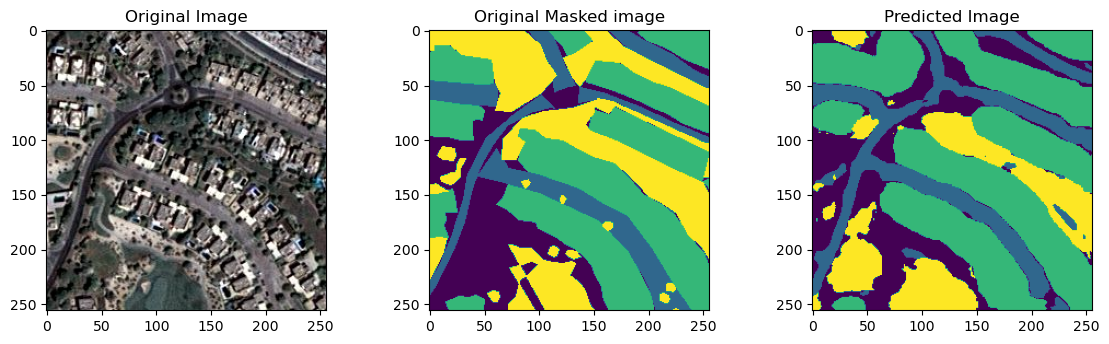

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


# Model saving and reloading (with custom loss and custom metrics)

- loss
  - 'dice_loss_plus_1focal_loss': total_loss
- Metrics
  - jaccard_coef: jaccard_coef

In [ ]:
model.get_config()

{'name': 'model_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_19',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d_19',
   'inbound_nodes': [[['input_2', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config': {'

In [ ]:
model.save('satellite-imagery_new.h5')

In [ ]:
!dir /a

 Volume in drive C is OS
 Volume Serial Number is 32DA-ABD2

 Directory of C:\Users\Dhaush Raj\DL-Epics

10-03-2024  10:34 PM    <DIR>          .
07-03-2024  10:54 AM    <DIR>          ..
09-03-2024  11:22 PM    <DIR>          .ipynb_checkpoints
09-03-2024  05:52 PM    <DIR>          Data
07-03-2024  11:04 AM    <DIR>          DubaiDataset
09-03-2024  01:21 AM           113,899 fc-img1.png
09-03-2024  11:22 PM         5,825,770 Ground Truth Labeling of Satellite Imagery using K-Means Clustering withÿPython (1).ipynb
09-03-2024  01:25 AM           316,641 image_part_001.jpg
09-03-2024  01:23 AM           161,406 image_part_009.jpg
10-03-2024  06:08 PM        10,047,613 Land Cover Classification in Satellite Imagery using Python (1).ipynb
09-03-2024  01:12 AM        23,503,304 satellite-imagery.h5
10-03-2024  10:34 PM        23,503,360 satellite-imagery_new.h5
07-03-2024  06:17 PM         1,622,958 Satellite_Imagery_DeepLearning-Base.ipynb
08-03-2024  08:44 PM         2,094,746 Satellite

In [ ]:
from keras.models import load_model 

In [ ]:
saved_model = load_model('satellite-imagery_new.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss, 
                                          'jaccard_coef': jaccard_coef}))

In [ ]:
saved_model

In [ ]:
model.loss.name

'dice_loss_plus_1focal_loss'

In [ ]:
saved_model.get_config()

{'name': 'model_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_19',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d_19',
   'inbound_nodes': [[['input_2', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config': {'

## Performing Prediction using the custom image from Google Map

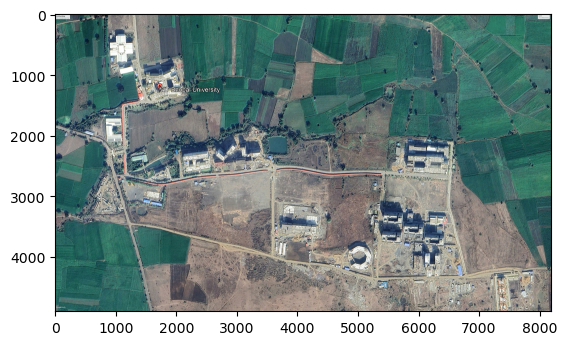

In [ ]:
plt.imshow(Image.open('vitb2.jpg'))

In [ ]:
image = Image.open('vitb2.jpg')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

In [ ]:
image.shape

(1, 256, 256, 3)

In [ ]:
image

array([[[[107, 144, 142],
         [137, 168, 166],
         [135, 166, 160],
         ...,
         [148, 169, 168],
         [151, 171, 171],
         [ 97, 128, 128]],

        [[163, 182, 180],
         [188, 192, 191],
         [181, 187, 186],
         ...,
         [233, 238, 238],
         [236, 240, 241],
         [128, 153, 153]],

        [[164, 184, 182],
         [196, 203, 202],
         [190, 197, 196],
         ...,
         [215, 221, 221],
         [221, 226, 226],
         [130, 154, 153]],

        ...,

        [[117, 133, 131],
         [104, 127, 126],
         [ 77, 119, 115],
         ...,
         [134, 129, 120],
         [132, 125, 118],
         [ 88,  88,  94]],

        [[103, 123, 119],
         [ 82, 109, 107],
         [ 52,  98,  96],
         ...,
         [117, 110, 104],
         [120, 114, 108],
         [ 97,  96, 103]],

        [[102, 121, 119],
         [ 72, 104, 102],
         [ 35,  93,  91],
         ...,
         [150, 141, 135],
        

In [ ]:
prediction = saved_model.predict(image)


1/1 [==============================] - 0s 59ms/step


In [ ]:
prediction

array([[[[0.0000000e+00, 1.8883448e-29, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 1.2906395e-31, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0

In [ ]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

In [ ]:
predicted_image

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 1, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 1, 3, 1]], dtype=int64)

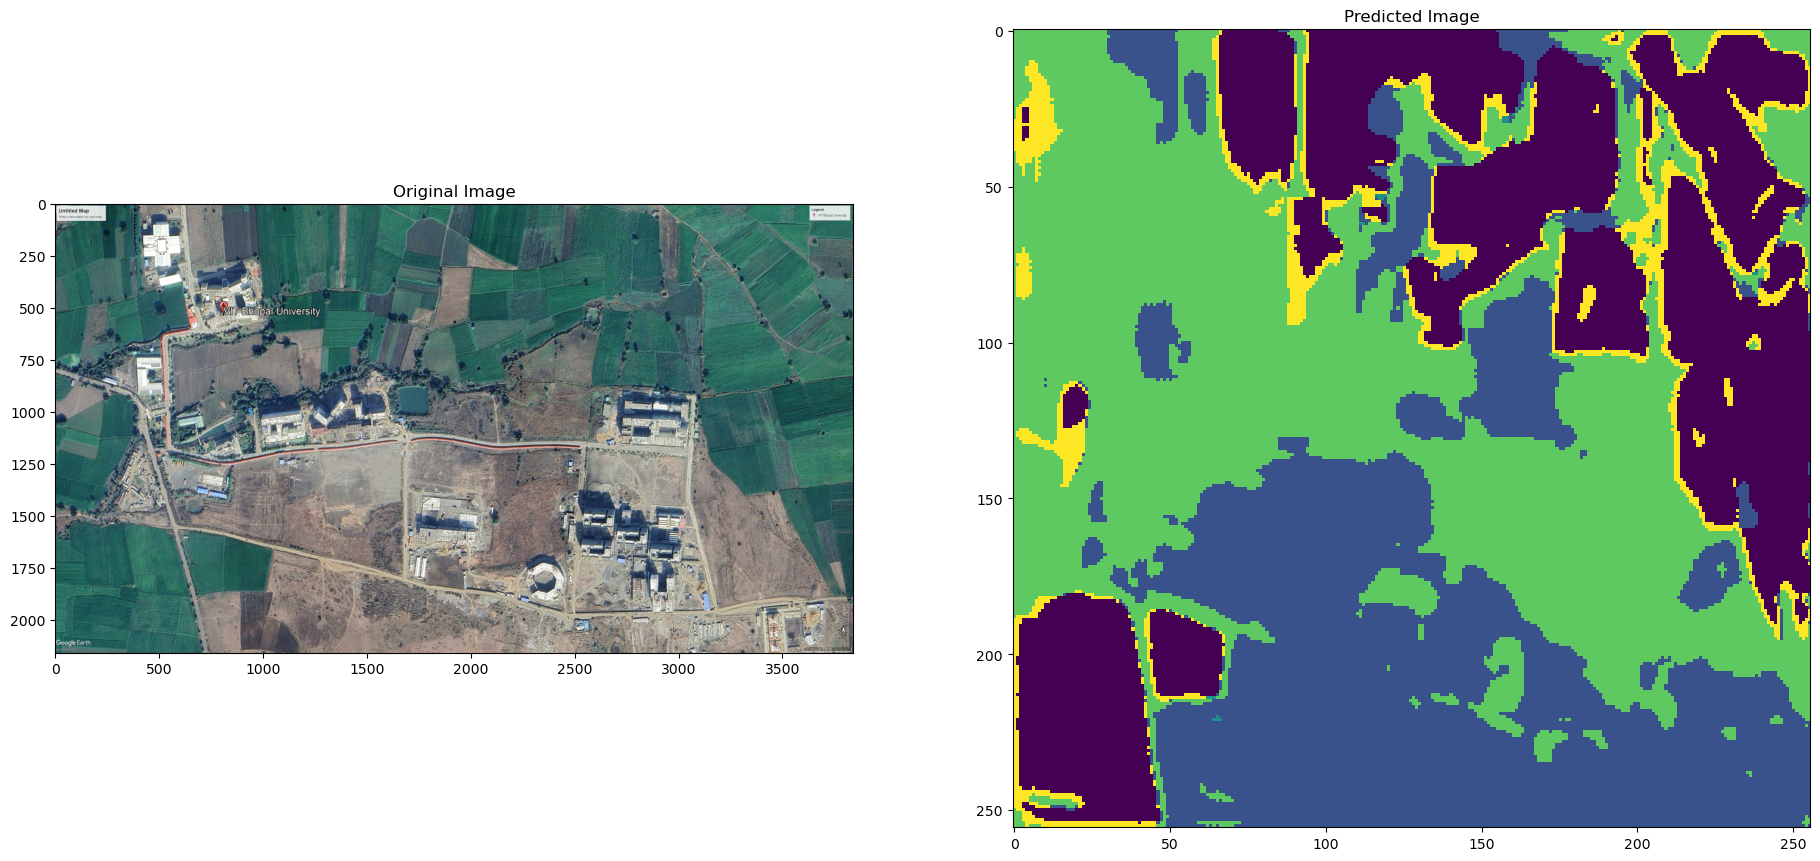

In [ ]:
plt.figure(figsize=(35,25))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('vitb1.jpg'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

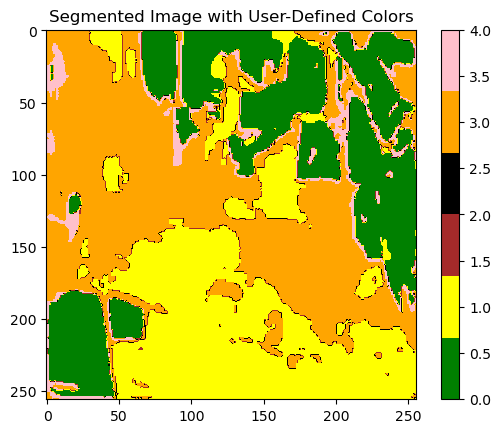

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define user-defined colors for different segments
segment_colors = {
    0: 'green',
    1: 'yellow',
    2: 'brown',
    3: 'black',
    4: 'orange',
    5: 'pink'
    
}

# Define your segmented image
segmented_image = predicted_image 

# Create a custom colormap using the user-defined colors
cmap = ListedColormap([segment_colors[i] for i in range(len(segment_colors))])

# Plot the segmented image using the custom colormap
plt.imshow(segmented_image, cmap=cmap)
plt.colorbar()  # Add colorbar for reference
plt.title('Segmented Image with User-Defined Colors')
plt.show()


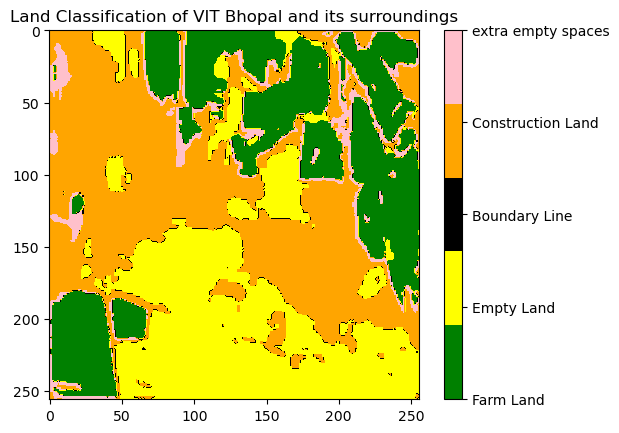

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define user-defined colors and names for different segments
segment_properties = {
    0: {'color': 'green', 'name': 'Farm Land'},
    1: {'color': 'yellow', 'name': 'Empty Land'},
    2: {'color': 'black', 'name': 'Boundary Line'},
    3: {'color': 'orange', 'name': 'Construction Land'},
    4: {'color': 'pink', 'name': 'extra empty spaces'}}

# Define your segmented image
segmented_image = predicted_image  # Replace this with your segmented image array

# Create a custom colormap using the user-defined colors
cmap_colors = [segment_properties[i]['color'] for i in range(len(segment_properties))]
cmap = ListedColormap(cmap_colors)

# Plot the segmented image using the custom colormap
plt.imshow(segmented_image, cmap=cmap)
cbar = plt.colorbar()  # Add colorbar for reference

# Customize colorbar ticks and labels
cbar.set_ticks(np.arange(len(segment_properties)))
cbar.set_ticklabels([segment_properties[i]['name'] for i in range(len(segment_properties))])

plt.title('Land Classification of VIT Bhopal and its surroundings')
plt.show()
